# Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import polars as pl 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


# Reading dataset

In [32]:
df=pd.read_csv("E:Data/train_phone.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Preprocessing

In [4]:
print(df.shape)

(2000, 21)


In [5]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Check if the data has missing values or not

In [8]:
df.isnull().sum().any()

False

# Detecting outliers

In [9]:
num_features = df.select_dtypes(include=[np.number])
num_features.shape

(2000, 21)

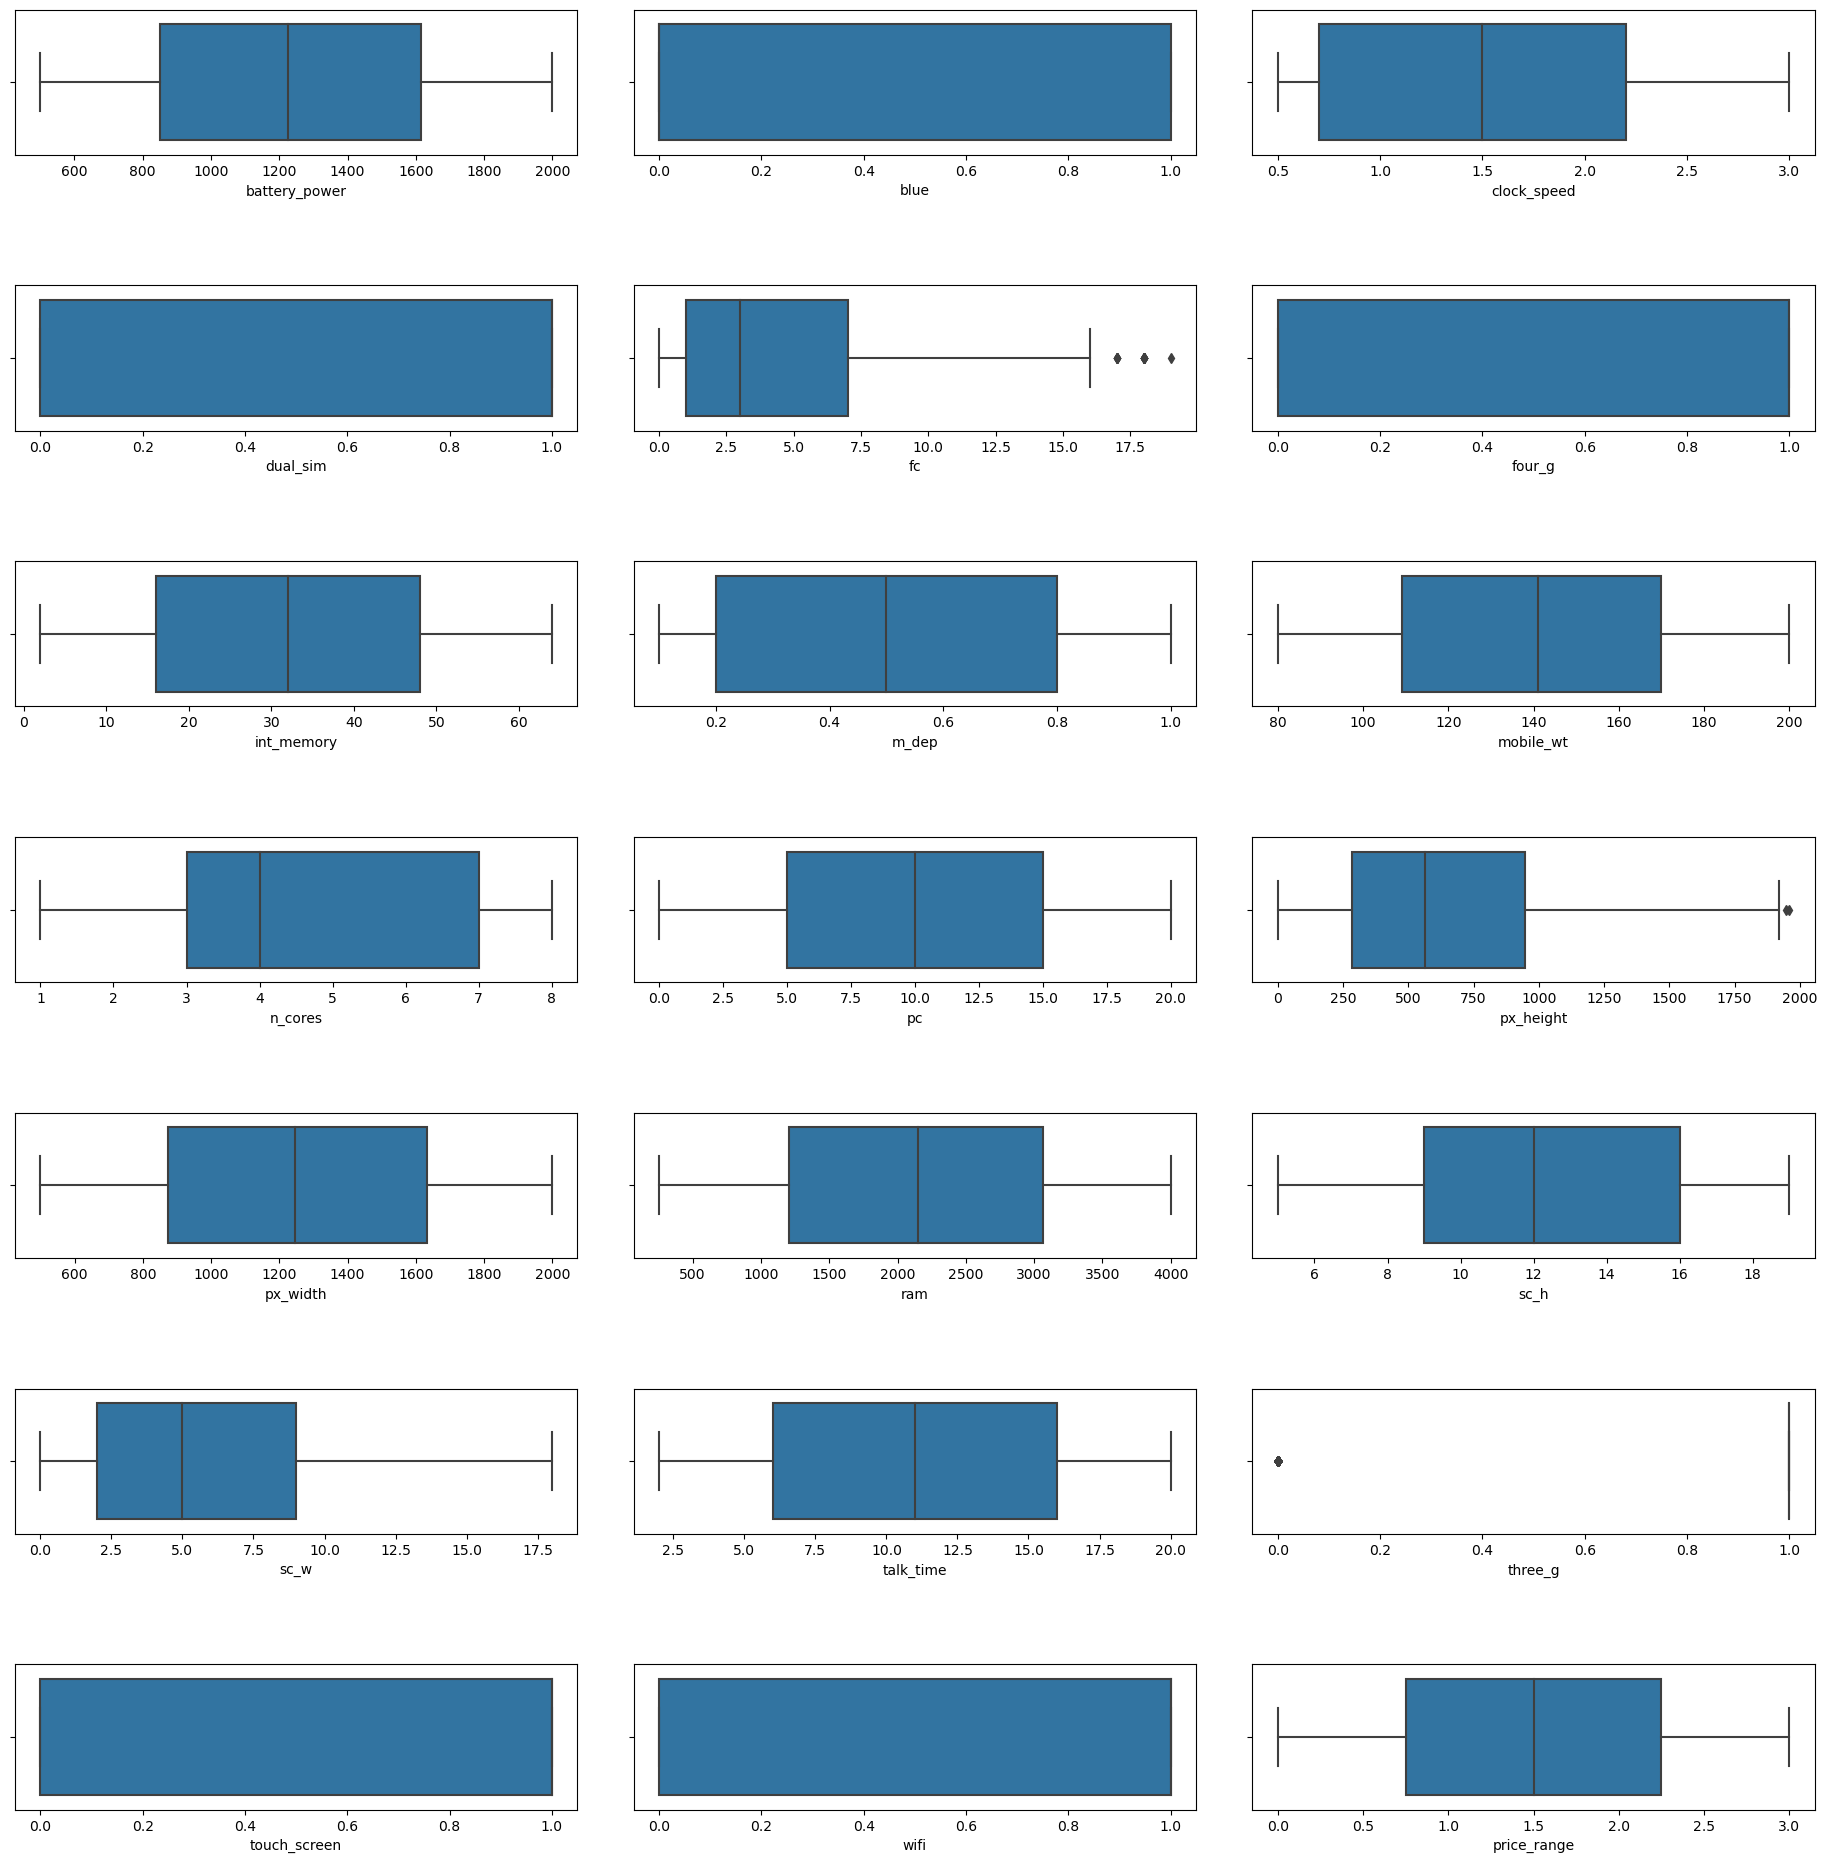

In [10]:

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20, 20)

for i in range(21):  # the number of numerical features 
    plt.subplot(7,3,i+1)
    sns.boxplot(num_features.iloc[:,i])
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1,
                        top=1,
                        wspace=0.1,
                        hspace=0.9)

plt.show()


# Removing outliers

In [11]:
print("Before Removing the outliers", df.shape)
df = df[df['fc']<15.5]
print("After Removing the outliers", df.shape)

print("Before Removing the outliers", df.shape)
df = df[df['px_height']<1900]
print("After Removing the outliers", df.shape)


Before Removing the outliers (2000, 21)
After Removing the outliers (1958, 21)
Before Removing the outliers (1958, 21)
After Removing the outliers (1953, 21)


# Correlation between features

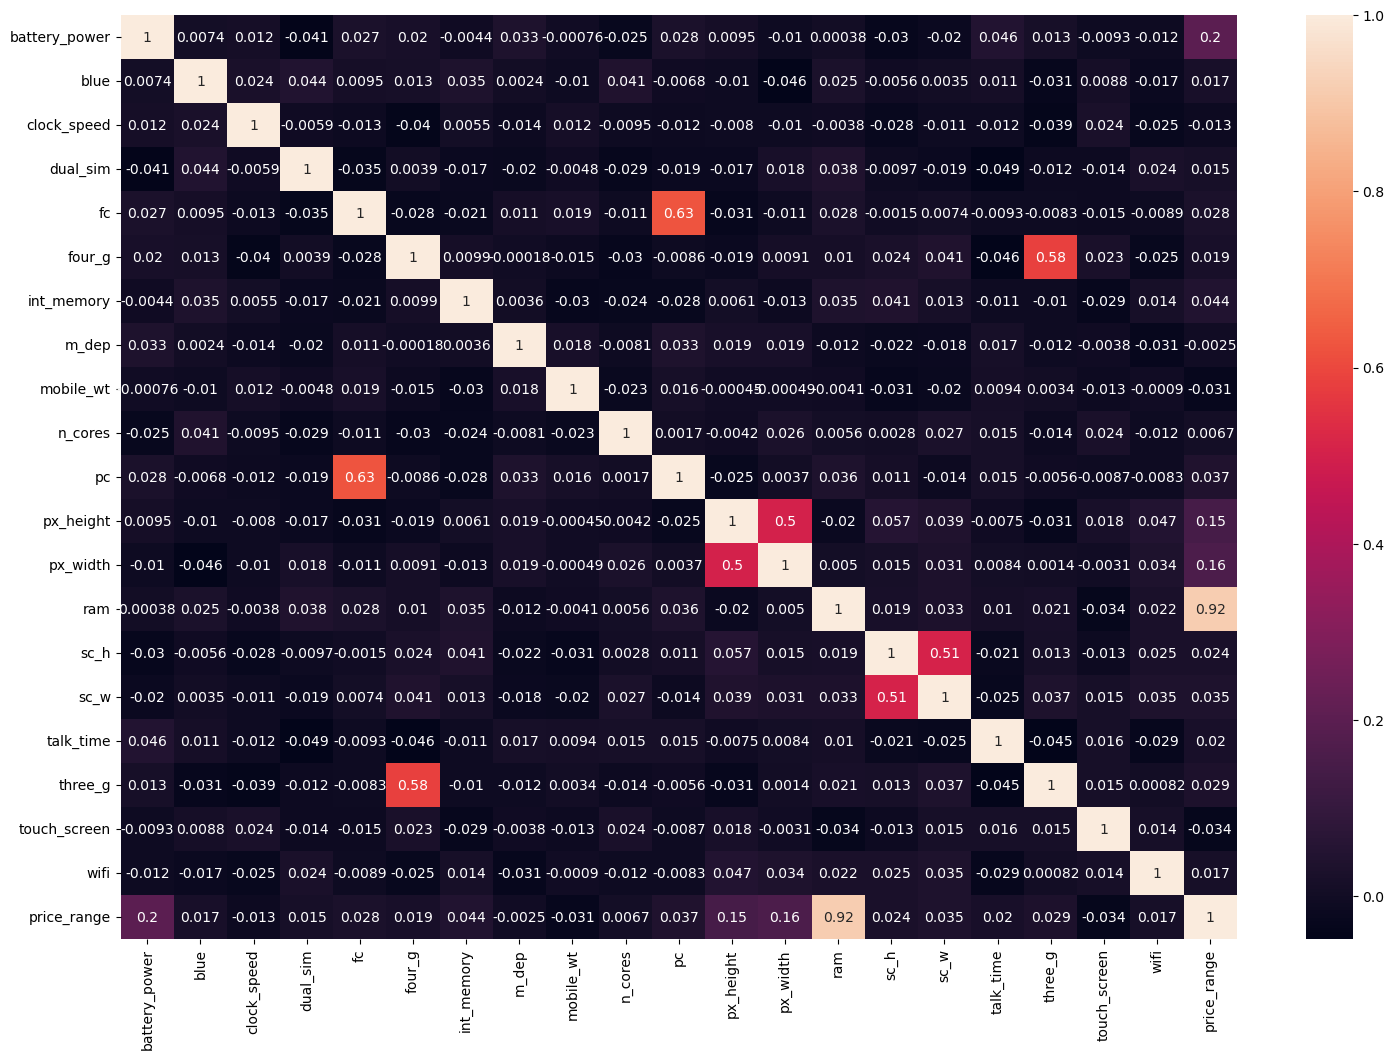

In [12]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Features Selection using SelectKBest

<!-- feature selection on the given dataset using the chi-square test. The electKBest class from the sklearn.
feature_selection module is used to select the top k features based on the chi-square test scores.Here the k value
is set to 12, which means that the algorithm will select the top 12 features with the highest chi-square test scores -->

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

# select top 12  features using chi-square test
selector = SelectKBest(chi2, k=12)
X_new = selector.fit_transform(df.drop(['price_range'], axis=1), df['price_range'])

In [14]:
# show the selected features
features = df.drop(['price_range'], axis=1).columns[selector.get_support()]
features.values

array(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype=object)

# Ceck if the data balanced or not 

In [15]:
df['price_range'].value_counts()

0    491
3    490
2    487
1    485
Name: price_range, dtype: int64

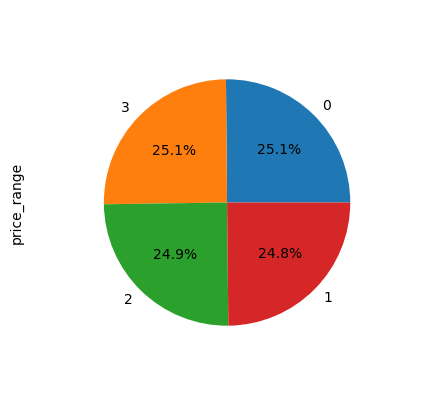

In [16]:
plt.figure(figsize=(5,5))
df['price_range'].value_counts().plot.pie(autopct="%1.1f%%", radius=.8)
plt.show()

# Declaring Target 

In [17]:
X=X_new
y = df['price_range']

In [18]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        cf1= confusion_matrix(y_train,pred)
        fig, ax = plt.subplots(figsize=(4, 2))
        sns.heatmap(cf1,annot=True,fmt = '.0f',ax=ax)
        plt.xlabel('prediction')
        plt.ylabel('Actual')
        plt.title(' Confusion Matrix')
        plt.show()
        print("______________________________________________________________________________________________________________")
        print("______________________________________________________________________________________________________________")
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        cf2= confusion_matrix(y_test,pred)
        fig, ax = plt.subplots(figsize=(4, 2))
        sns.heatmap(cf2,annot=True,fmt = '.0f',ax=ax)
        plt.xlabel('prediction')
        plt.ylabel('Actual')
        plt.title(' Confusion Matrix')
        plt.show()


# Splitting data into  train and test 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=47)

#  Normalizing Our Data

In [20]:
from sklearn.preprocessing import MinMaxScaler
# names = X_train.columns
scaler=MinMaxScaler()

# fit scaler on training data
scaler.fit(X_train)

# transform training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1562, 12)
(391, 12)
(1562,)
(391,)


# <==============  Evaluation  ===============>

# Linear Support Vector Machine Model 

Train Result:
Accuracy Score: 97.76%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.980630    0.975806    0.969620    0.984293  0.977593   
recall       0.995086    0.957784    0.967172    0.989474  0.977593   
f1-score     0.987805    0.966711    0.968394    0.986877  0.977593   
support    407.000000  379.000000  396.000000  380.000000  0.977593   

             macro avg  weighted avg  
precision     0.977587      0.977559  
recall        0.977379      0.977593  
f1-score      0.977447      0.977540  
support    1562.000000   1562.000000  
_______________________________________________


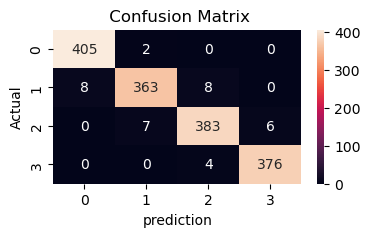

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
Test Result:
Accuracy Score: 98.72%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1          2           3  accuracy   macro avg  \
precision   1.000000    0.981308   0.978022    0.990909  0.987212    0.987560   
recall      0.988095    0.990566   0.978022    0.990909  0.987212    0.986898   
f1-score    0.994012    0.985915   0.978022    0.990909  0.987212    0.987215   
support    84.000000  106.000000  91.000000  110.000000  0.987212  391.000000   

           weighted avg  
precision      0.987260  
recall         0.987212  
f1-score       0.987223  
support      391.000000  
_______________________________________________


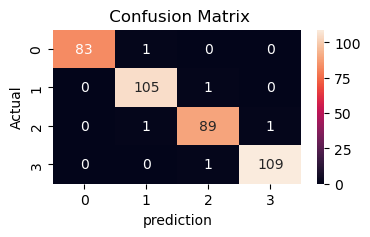

In [22]:
from sklearn.svm import LinearSVC
SVM = SVC(C= 100,gamma= 1,kernel="linear").fit(X_train, y_train)
y_pred = SVM.predict(X_test)
SVM_accuracy = accuracy_score(y_pred,y_test)
print_score(SVM, X_train , y_train , X_test   , y_test  ,train=True)

# Logistic Regression Model

Train Result:
Accuracy Score: 97.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.983092    0.968000    0.966667    0.981723  0.975032   
recall       1.000000    0.957784    0.952020    0.989474  0.975032   
f1-score     0.991474    0.962865    0.959288    0.985583  0.975032   
support    407.000000  379.000000  396.000000  380.000000  0.975032   

             macro avg  weighted avg  
precision     0.974870      0.974933  
recall        0.974819      0.975032  
f1-score      0.974802      0.974939  
support    1562.000000   1562.000000  
_______________________________________________


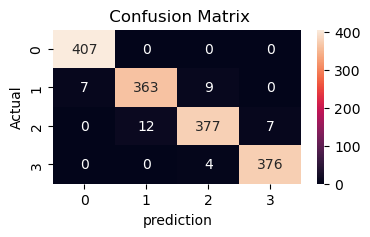

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
Test Result:
Accuracy Score: 98.47%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1          2           3  accuracy   macro avg  \
precision   0.976744    0.981132   0.988764    0.990909  0.984655    0.984387   
recall      1.000000    0.981132   0.967033    0.990909  0.984655    0.984769   
f1-score    0.988235    0.981132   0.977778    0.990909  0.984655    0.984514   
support    84.000000  106.000000  91.000000  110.000000  0.984655  391.000000   

           weighted avg  
precision      0.984716  
recall         0.984655  
f1-score       0.984628  
support      391.000000  
_______________________________________________


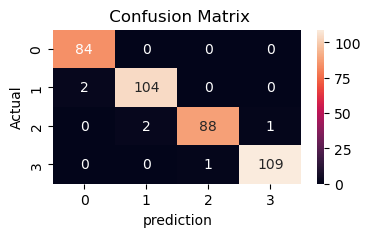

In [23]:
lr = LogisticRegression(C= 10, penalty= 'l2',solver= 'newton-cg',max_iter=1500).fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_pred,y_test)
print_score(lr, X_train , y_train , X_test   , y_test  ,train=True)

# Decision Tree Model

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    407.0  379.0  396.0  380.0       1.0     1562.0        1562.0
_______________________________________________


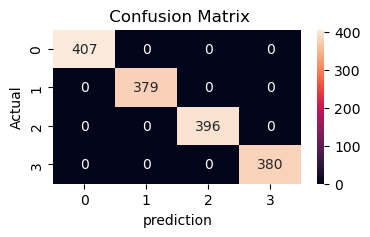

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
Test Result:
Accuracy Score: 81.84%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1          2           3  accuracy   macro avg  \
precision   0.829787    0.826531   0.728261    0.878505  0.818414    0.815771   
recall      0.928571    0.764151   0.736264    0.854545  0.818414    0.820883   
f1-score    0.876404    0.794118   0.732240    0.866359  0.818414    0.817281   
support    84.000000  106.000000  91.000000  110.000000  0.818414  391.000000   

           weighted avg  
precision      0.818981  
recall         0.818414  
f1-score       0.817718  
support      391.000000  
_______________________________________________


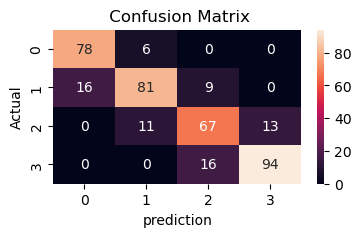

In [24]:
dt= DecisionTreeClassifier(criterion= 'gini', max_depth= 395).fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_pred,y_test)
print_score(dt, X_train , y_train , X_test   , y_test  ,train=True)

# RandomForestClassifier

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1      2      3  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0    1.0       1.0        1.0           1.0
support    407.0  379.0  396.0  380.0       1.0     1562.0        1562.0
_______________________________________________


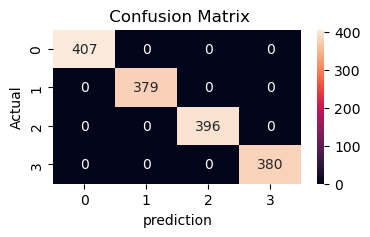

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
Test Result:
Accuracy Score: 88.24%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1          2           3  accuracy   macro avg  \
precision   0.906977    0.875000   0.797980    0.950980  0.882353    0.882734   
recall      0.928571    0.858491   0.868132    0.881818  0.882353    0.884253   
f1-score    0.917647    0.866667   0.831579    0.915094  0.882353    0.882747   
support    84.000000  106.000000  91.000000  110.000000  0.882353  391.000000   

           weighted avg  
precision      0.885320  
recall         0.882353  
f1-score       0.883077  
support      391.000000  
_______________________________________________


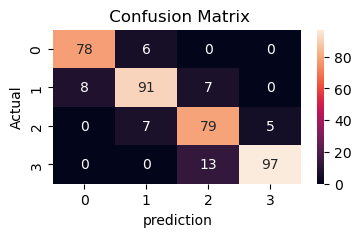

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(criterion= 'gini',max_depth= 20, max_features='sqrt',n_estimators=1000).fit(X_train, y_train)
y_pred = RF.predict(X_test)
RF_accuracy = accuracy_score(y_pred,y_test)
print_score(RF, X_train , y_train , X_test   , y_test  ,train=True)

# KNeighborsClassifier

Train Result:
Accuracy Score: 69.40%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.721519    0.675000    0.575472    0.878136  0.693982   
recall       0.980344    0.356201    0.770202    0.644737  0.693982   
f1-score     0.831250    0.466321    0.658747    0.743551  0.693982   
support    407.000000  379.000000  396.000000  380.000000  0.693982   

             macro avg  weighted avg  
precision     0.712532      0.711307  
recall        0.687871      0.693982  
f1-score      0.674967      0.677636  
support    1562.000000   1562.000000  
_______________________________________________


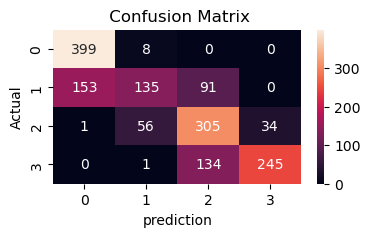

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
Test Result:
Accuracy Score: 66.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1          2           3  accuracy   macro avg  \
precision   0.643411    0.693878   0.523077    0.903614  0.664962    0.690995   
recall      0.988095    0.320755   0.747253    0.681818  0.664962    0.684480   
f1-score    0.779343    0.438710   0.615385    0.777202  0.664962    0.652660   
support    84.000000  106.000000  91.000000  110.000000  0.664962  391.000000   

           weighted avg  
precision      0.702289  
recall         0.664962  
f1-score       0.648236  
support      391.000000  
_______________________________________________


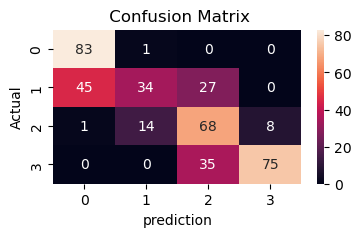

In [26]:
KNN = KNeighborsClassifier(n_neighbors=389).fit(X_train, y_train)
y_pred = KNN.predict(X_test)
KNN_accuracy = accuracy_score(y_pred,y_test)
print_score(KNN, X_train , y_train , X_test   , y_test  ,train=True)

# Naive Bayes Classifier

Train Result:
Accuracy Score: 81.31%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2           3  accuracy  \
precision    0.914216    0.714667    0.715711    0.904762   0.81306   
recall       0.916462    0.707124    0.724747    0.900000   0.81306   
f1-score     0.915337    0.710875    0.720201    0.902375   0.81306   
support    407.000000  379.000000  396.000000  380.000000   0.81306   

             macro avg  weighted avg  
precision     0.812339      0.813172  
recall        0.812083      0.813060  
f1-score      0.812197      0.813102  
support    1562.000000   1562.000000  
_______________________________________________


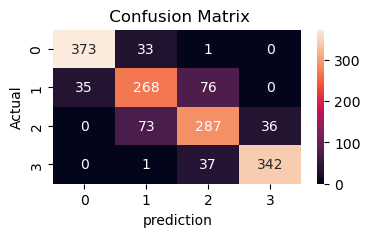

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
Test Result:
Accuracy Score: 77.75%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1          2           3  accuracy   macro avg  \
precision   0.865854    0.704762   0.640000    0.913462  0.777494    0.781019   
recall      0.845238    0.698113   0.703297    0.863636  0.777494    0.777571   
f1-score    0.855422    0.701422   0.670157    0.887850  0.777494    0.778713   
support    84.000000  106.000000  91.000000  110.000000  0.777494  391.000000   

           weighted avg  
precision      0.783011  
recall         0.777494  
f1-score       0.779678  
support      391.000000  
_______________________________________________


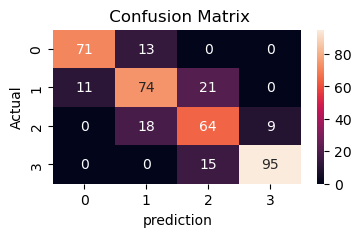

In [27]:
from sklearn.naive_bayes import GaussianNB
NB= GaussianNB().fit(X_train, y_train)
y_pred = NB.predict(X_test)
NB_accuracy = accuracy_score(y_pred,y_test)
print_score(NB, X_train , y_train , X_test   , y_test  ,train=True)

# Conclusion

In [28]:
models = ["LSVM",'LogisticRegression','DecisionTree','RandomForest',"KNN","NB"]
model_data = [SVM_accuracy*100,lr_accuracy*100, dt_accuracy*100, RF_accuracy*100,KNN_accuracy*100,NB_accuracy*100]
cols = ["accuracy_score"]
compare=pd.DataFrame(data=model_data , index= models , columns= cols)
compare.sort_values(ascending= False , by = ['accuracy_score'])

,accuracy_score
LSVM,98.721228
LogisticRegression,98.465473
RandomForest,88.235294
DecisionTree,81.841432
NB,77.749361
KNN,66.496164
